# 1. Setup

## 1.1 Imports

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
import tensorflow as tf
import tensorboard
import Utils
import datetime

Using TensorFlow backend.


## 1.2 Set random seeds

In [2]:
np.random.seed(117)
tf.set_random_seed(117)

## 1.3 Global variables

In [3]:
img_width = 100
img_height = 100
img_channels = 3

# 2. Carga de datos

In [4]:
bees, bees_test_for_evaluation = Utils.read_data()

In [5]:
bees.head()

,id,datetime,file,location,zip code,subspecies,health,pollen_carrying,caste
0,0,2018-08-06 14:48:00,020_011.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
1,1,2018-08-21 09:00:00,032_507.png,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
2,2,2018-08-21 09:00:00,032_612.png,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
3,3,2018-08-17 17:50:00,030_773.png,"Alvin, TX, USA",77511,Italian honey bee,ant problems,False,worker
4,4,2018-08-06 13:19:00,015_1052.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker


In [6]:
bees_test_for_evaluation.head()

,id,datetime,file,location,zip code,pollen_carrying,caste
0,0,2018-08-28 16:07:00,042_012.png,"Alvin, TX, USA",77511,False,worker
1,1,2018-08-10 13:54:00,022_114.png,"Saratoga, CA, USA",95070,False,worker
2,2,2018-08-18 12:30:00,038_384.png,"Athens, Georgia, USA",30607,False,worker
3,3,2018-08-17 17:50:00,030_740.png,"Alvin, TX, USA",77511,False,worker
4,4,2018-07-07 12:56:00,005_310.png,"Saratoga, CA, USA",95070,False,worker


# 3. Análisis exploratorio de datos

## 3.1 Análisis descriptivo: Distribuciones, Scatterplots, Barplots...

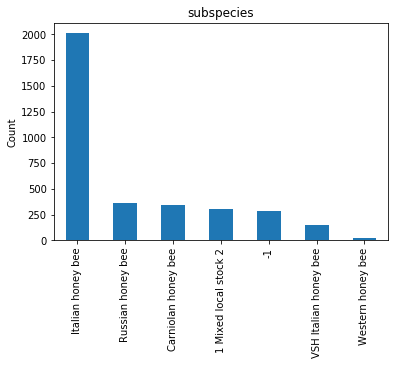

In [7]:
Utils.value_counts(bees, 'subspecies')

## 3.2 Ver imágenes

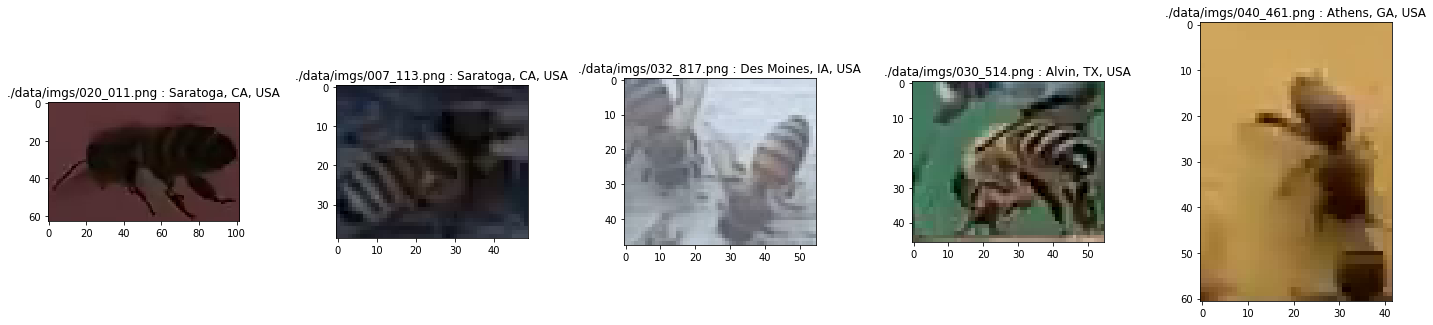

In [8]:
Utils.plot_images(bees, 'location', [0, 18, 24, 38, 45])

# 4. Clasificación

## 4.1. Data preprocessing
### 4.1.1 Particionamiento

In [9]:
train_bees, val_bees, test_bees = Utils.split(bees)
train_bees

,id,datetime,file,location,zip code,subspecies,health,pollen_carrying,caste
225,225,2018-08-06 13:19:00,015_996.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
2453,2453,2018-08-06 13:19:00,015_895.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
3009,3009,2018-08-21 15:56:00,040_526.png,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker
3270,3270,2018-08-19 12:46:00,010_123.png,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker
2622,2622,2018-08-10 13:54:00,022_361.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
...,...,...,...,...,...,...,...,...,...
1275,1275,2018-08-28 16:07:00,042_004.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1439,1439,2018-08-06 19:19:00,019_1195.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
1175,1175,2018-08-17 17:50:00,030_883.png,"Alvin, TX, USA",77511,Italian honey bee,ant problems,False,worker
2765,2765,2018-08-10 13:54:00,022_379.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker



### 4.1.2 Carga de imágenes

In [10]:
train_X, val_X, test_X, train_y, val_y, test_y = Utils.load_images_and_target(train_bees, 
                                                                              val_bees, 
                                                                              test_bees,
                                                                              'subspecies',
                                                                              img_width, 
                                                                              img_height,
                                                                              img_channels)

## 4.2 CNN

In [11]:
optimizer = 'sgd'
loss = 'categorical_crossentropy'

In [40]:
Num_Architecture = 1
#model1 = Sequential()
#model1.add(Flatten(input_shape =(img_height, img_width, img_channels)))
#model1.add(Dense(train_y.columns.size, activation = 'softmax'))
#model1.summary()


model1 = Sequential()
model1.add(Conv2D(32,kernel_size=4,padding='same',activation='relu',input_shape =(img_height, img_width, img_channels))) #capa Conv
model1.add(MaxPool2D(3))

model1.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model1.add(MaxPool2D(3))

#model1.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
#model1.add(MaxPool2D(3))

#model1.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
#model1.add(MaxPool2D(2))
# Add output layer
model1.add(Flatten())
#model1.add(Dropout(rate=0.1)) 
model1.add(Dense(train_y.columns.size, activation = 'softmax'))
model1.summary()
           

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      1568      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 16)        4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 13559     
Total params: 19,751
Trainable params: 19,751
Non-trainable params: 0
_________________________________________________________________


## 4.3 Entrenamiento

### 4.2.2 Parámetros de transformación de imágenes (data augmentation)

In [41]:
rotation_range = 270      # rotación aleatoria en grados entre 0 a rotation_range
zoom_range = 0.10         # zoom aleatorio
width_shift_range = 0.5  # desplazamiento horizontal aleatorio (fracción del total)
height_shift_range = 0.5 # desplazamiento vertical aleatorio (fracción del total)
horizontal_flip = True   # transposición horizontal
vertical_flip = True     # transposición horizontal

In [42]:

epochs = 50
steps_per_epoch = 80
patience = 30
class_weights = Utils.class_weights(bees, 'subspecies')

In [43]:
class_weights

array([ 1.75531915,  1.64451827,  1.43895349,  0.24626866,  1.375     ,
        3.39041096, 22.5       ])


--------------------------------Inicio----------------------------------------
StartTime:  2019-11-14 22:16:55.793398  lr: 0.01  batch: 150 epochs:  80  inicio iteracion:  1

Epoch 1/80
120/120 [==============================] - 46s 383ms/step - loss: 1.1474 - acc: 0.6257 - val_loss: 0.8119 - val_acc: 0.7038
Epoch 2/80
120/120 [==============================] - 45s 373ms/step - loss: 0.8248 - acc: 0.7126 - val_loss: 0.8395 - val_acc: 0.7269
Epoch 3/80
120/120 [==============================] - 55s 458ms/step - loss: 0.6965 - acc: 0.7492 - val_loss: 0.4793 - val_acc: 0.8385
Epoch 4/80
120/120 [==============================] - 46s 380ms/step - loss: 0.7316 - acc: 0.7241 - val_loss: 0.5772 - val_acc: 0.7731
Epoch 5/80
120/120 [==============================] - 46s 382ms/step - loss: 0.5709 - acc: 0.7932 - val_loss: 0.4663 - val_acc: 0.8000
Epoch 6/80
120/120 [==============================] - 48s 398ms/step - loss: 0.6233 - acc: 0.7567 - val_loss: 0.4621 - val_acc: 0.8308
Epoch 7/80
120

120/120 [==============================] - 52s 432ms/step - loss: 0.2917 - acc: 0.8735 - val_loss: 0.2172 - val_acc: 0.9077
Epoch 61/80
120/120 [==============================] - 46s 387ms/step - loss: 0.2709 - acc: 0.8840 - val_loss: 0.2012 - val_acc: 0.9038
Epoch 62/80
120/120 [==============================] - 48s 402ms/step - loss: 0.2620 - acc: 0.8851 - val_loss: 0.2076 - val_acc: 0.9115
Epoch 63/80
120/120 [==============================] - 47s 388ms/step - loss: 0.2593 - acc: 0.8896 - val_loss: 0.2040 - val_acc: 0.9308
Epoch 64/80
120/120 [==============================] - 46s 383ms/step - loss: 0.2514 - acc: 0.8916 - val_loss: 0.2214 - val_acc: 0.9308
Epoch 65/80
120/120 [==============================] - 46s 383ms/step - loss: 0.2611 - acc: 0.8889 - val_loss: 0.2691 - val_acc: 0.9000
Epoch 66/80
120/120 [==============================] - 46s 381ms/step - loss: 0.2662 - acc: 0.8873 - val_loss: 0.2262 - val_acc: 0.8885
Epoch 67/80
120/120 [==============================] - 45s 3

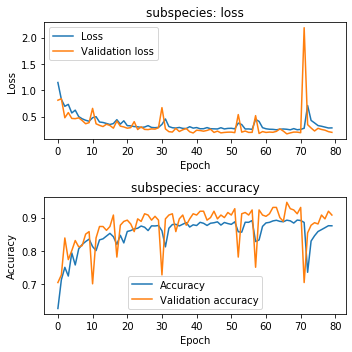

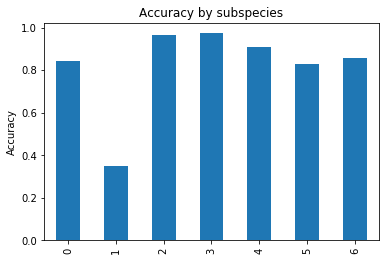

Classification report
                       precision    recall  f1-score   support

                   -1       0.94      0.84      0.89        70
1 Mixed local stock 2       0.67      0.35      0.46        69
  Carniolan honey bee       1.00      0.97      0.98        92
    Italian honey bee       0.89      0.97      0.93       490
    Russian honey bee       0.98      0.95      0.96       110
VSH Italian honey bee       0.86      0.83      0.84        29
    Western honey bee       0.86      0.86      0.86         7

             accuracy                           0.90       867
            macro avg       0.88      0.82      0.85       867
         weighted avg       0.90      0.90      0.89       867

Loss function: 0.2698516835390903, accuracy: 0.903114186851211
StartTime:  2019-11-14 22:16:55.793398  lr: 0.01  batch: 150 epochs:  80  Fin iteracion:  2
-------------------------------FIN-----------------------------------------


--------------------------------Inicio-----------

120/120 [==============================] - 43s 358ms/step - loss: 0.2390 - acc: 0.8950 - val_loss: 0.1926 - val_acc: 0.9077
Epoch 53/100
120/120 [==============================] - 43s 357ms/step - loss: 0.2395 - acc: 0.8945 - val_loss: 0.1847 - val_acc: 0.9308
Epoch 54/100
120/120 [==============================] - 42s 353ms/step - loss: 0.2365 - acc: 0.8972 - val_loss: 0.2013 - val_acc: 0.9192
Epoch 55/100
120/120 [==============================] - 43s 362ms/step - loss: 0.2618 - acc: 0.8876 - val_loss: 0.1970 - val_acc: 0.9077
Epoch 56/100
120/120 [==============================] - 43s 358ms/step - loss: 0.2355 - acc: 0.8973 - val_loss: 0.2254 - val_acc: 0.8962
Epoch 57/100
120/120 [==============================] - 43s 356ms/step - loss: 0.2395 - acc: 0.8968 - val_loss: 0.1868 - val_acc: 0.9192
Epoch 58/100
120/120 [==============================] - 43s 360ms/step - loss: 0.2423 - acc: 0.8946 - val_loss: 0.1803 - val_acc: 0.9154
Epoch 59/100
120/120 [==============================] 

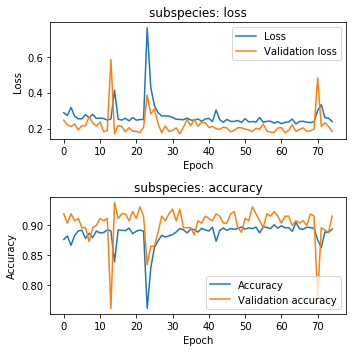

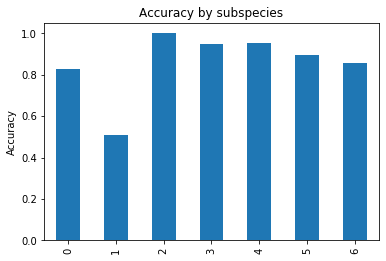

Classification report
                       precision    recall  f1-score   support

                   -1       0.97      0.83      0.89        70
1 Mixed local stock 2       0.60      0.51      0.55        69
  Carniolan honey bee       1.00      1.00      1.00        92
    Italian honey bee       0.91      0.95      0.93       490
    Russian honey bee       0.98      0.95      0.97       110
VSH Italian honey bee       0.74      0.90      0.81        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.89      0.86      0.87       867
         weighted avg       0.91      0.91      0.91       867

Loss function: 0.22806631188491636, accuracy: 0.9077277970011534
StartTime:  2019-11-15 01:00:14.894478  lr: 0.01  batch: 150 epochs:  100  Fin iteracion:  3
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------

180/180 [==============================] - 27s 151ms/step - loss: 0.3225 - acc: 0.8694 - val_loss: 0.2149 - val_acc: 0.8923
Epoch 54/80
180/180 [==============================] - 29s 163ms/step - loss: 0.3099 - acc: 0.8718 - val_loss: 0.2438 - val_acc: 0.9000
Epoch 55/80
180/180 [==============================] - 33s 181ms/step - loss: 0.2682 - acc: 0.8872 - val_loss: 0.2692 - val_acc: 0.8962
Epoch 56/80
180/180 [==============================] - 28s 154ms/step - loss: 0.2848 - acc: 0.8795 - val_loss: 0.2175 - val_acc: 0.9192
Epoch 57/80
180/180 [==============================] - 27s 152ms/step - loss: 0.3254 - acc: 0.8635 - val_loss: 0.2613 - val_acc: 0.8692
Epoch 58/80
180/180 [==============================] - 27s 152ms/step - loss: 0.2870 - acc: 0.8766 - val_loss: 0.2252 - val_acc: 0.9077
Epoch 59/80
180/180 [==============================] - 27s 151ms/step - loss: 0.2716 - acc: 0.8812 - val_loss: 0.1971 - val_acc: 0.9077
Epoch 60/80
180/180 [==============================] - 27s 1

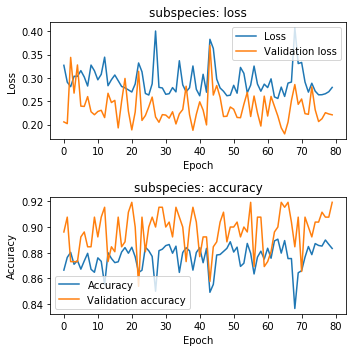

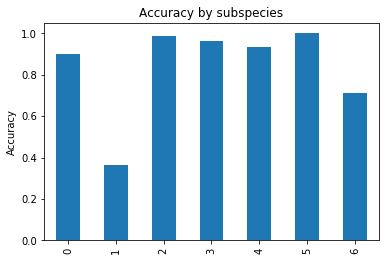

Classification report
                       precision    recall  f1-score   support

                   -1       0.95      0.90      0.93        70
1 Mixed local stock 2       0.61      0.36      0.45        69
  Carniolan honey bee       0.99      0.99      0.99        92
    Italian honey bee       0.90      0.96      0.93       490
    Russian honey bee       0.99      0.94      0.96       110
VSH Italian honey bee       0.85      1.00      0.92        29
    Western honey bee       1.00      0.71      0.83         7

             accuracy                           0.91       867
            macro avg       0.90      0.84      0.86       867
         weighted avg       0.90      0.91      0.90       867

Loss function: 0.2249514208306587, accuracy: 0.908881199538639
StartTime:  2019-11-15 01:55:39.570965  lr: 0.01  batch: 60 epochs:  80  Fin iteracion:  4
-------------------------------FIN-----------------------------------------


--------------------------------Inicio------------

180/180 [==============================] - 27s 152ms/step - loss: 0.2600 - acc: 0.8930 - val_loss: 0.2905 - val_acc: 0.8731
Epoch 53/100
180/180 [==============================] - 27s 150ms/step - loss: 0.2664 - acc: 0.8891 - val_loss: 0.1974 - val_acc: 0.9192
Epoch 54/100
180/180 [==============================] - 27s 152ms/step - loss: 0.2678 - acc: 0.8869 - val_loss: 0.2054 - val_acc: 0.9038
Epoch 55/100
180/180 [==============================] - 28s 153ms/step - loss: 0.2773 - acc: 0.8840 - val_loss: 0.2396 - val_acc: 0.8962
Epoch 56/100
180/180 [==============================] - 27s 151ms/step - loss: 0.2969 - acc: 0.8775 - val_loss: 0.2047 - val_acc: 0.9231
Epoch 57/100
180/180 [==============================] - 27s 151ms/step - loss: 0.2680 - acc: 0.8897 - val_loss: 0.2257 - val_acc: 0.9038
Epoch 58/100
180/180 [==============================] - 27s 152ms/step - loss: 0.2636 - acc: 0.8875 - val_loss: 0.2473 - val_acc: 0.9038
Epoch 59/100
180/180 [==============================] 

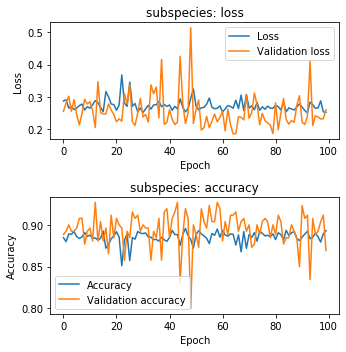

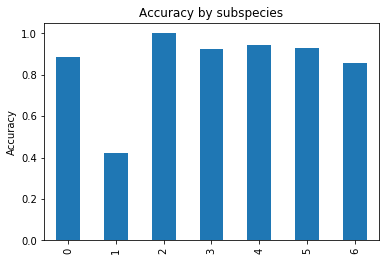

Classification report
                       precision    recall  f1-score   support

                   -1       0.85      0.89      0.87        70
1 Mixed local stock 2       0.60      0.42      0.50        69
  Carniolan honey bee       1.00      1.00      1.00        92
    Italian honey bee       0.90      0.93      0.91       490
    Russian honey bee       0.98      0.95      0.97       110
VSH Italian honey bee       0.79      0.93      0.86        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.90       867
            macro avg       0.88      0.85      0.86       867
         weighted avg       0.89      0.90      0.89       867

Loss function: 0.2713897229646813, accuracy: 0.8961937716262975
StartTime:  2019-11-15 02:32:13.217538  lr: 0.01  batch: 60 epochs:  100  Fin iteracion:  5
-------------------------------FIN-----------------------------------------


--------------------------------Inicio----------

270/270 [==============================] - 65s 241ms/step - loss: 0.2415 - acc: 0.8982 - val_loss: 0.2248 - val_acc: 0.9038
Epoch 54/80
270/270 [==============================] - 64s 238ms/step - loss: 0.2396 - acc: 0.8984 - val_loss: 0.2328 - val_acc: 0.9077
Epoch 55/80
270/270 [==============================] - 66s 245ms/step - loss: 0.2538 - acc: 0.8934 - val_loss: 0.3083 - val_acc: 0.8885
Epoch 56/80
270/270 [==============================] - 64s 238ms/step - loss: 0.2507 - acc: 0.8946 - val_loss: 0.2701 - val_acc: 0.8923
Epoch 57/80
270/270 [==============================] - 66s 243ms/step - loss: 0.2532 - acc: 0.8948 - val_loss: 0.2359 - val_acc: 0.9038
Epoch 58/80
270/270 [==============================] - 65s 242ms/step - loss: 0.2401 - acc: 0.8980 - val_loss: 0.2414 - val_acc: 0.8846
Epoch 59/80
270/270 [==============================] - 66s 244ms/step - loss: 0.2340 - acc: 0.9006 - val_loss: 0.2348 - val_acc: 0.9423
Epoch 60/80
270/270 [==============================] - 64s 2

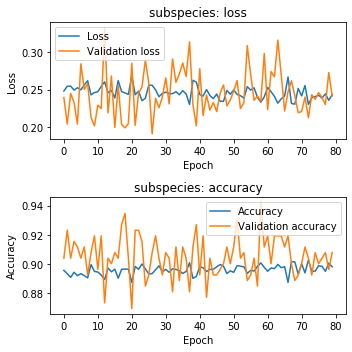

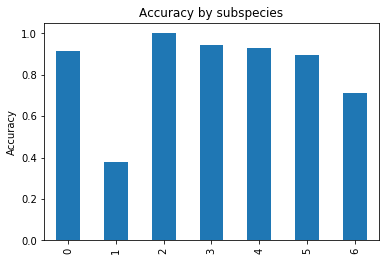

Classification report
                       precision    recall  f1-score   support

                   -1       0.89      0.91      0.90        70
1 Mixed local stock 2       0.53      0.38      0.44        69
  Carniolan honey bee       1.00      1.00      1.00        92
    Italian honey bee       0.90      0.94      0.92       490
    Russian honey bee       0.98      0.94      0.96       110
VSH Italian honey bee       0.84      0.90      0.87        29
    Western honey bee       1.00      0.71      0.83         7

             accuracy                           0.90       867
            macro avg       0.88      0.83      0.85       867
         weighted avg       0.89      0.90      0.89       867

Loss function: 0.2573946121072162, accuracy: 0.8973471741637832
StartTime:  2019-11-15 03:17:48.580177  lr: 0.01  batch: 100 epochs:  80  Fin iteracion:  6
-------------------------------FIN-----------------------------------------


--------------------------------Inicio----------

270/270 [==============================] - 65s 240ms/step - loss: 0.2287 - acc: 0.9017 - val_loss: 0.2591 - val_acc: 0.9154
Epoch 53/100
270/270 [==============================] - 65s 242ms/step - loss: 0.2290 - acc: 0.8993 - val_loss: 0.2306 - val_acc: 0.9115
Epoch 54/100
270/270 [==============================] - 65s 241ms/step - loss: 0.2566 - acc: 0.8924 - val_loss: 0.2655 - val_acc: 0.9000
Epoch 55/100
270/270 [==============================] - 65s 241ms/step - loss: 0.2342 - acc: 0.9014 - val_loss: 0.2598 - val_acc: 0.9038
Epoch 56/100
270/270 [==============================] - 65s 242ms/step - loss: 0.2310 - acc: 0.9010 - val_loss: 0.2538 - val_acc: 0.8962
Epoch 57/100
270/270 [==============================] - 65s 240ms/step - loss: 0.2323 - acc: 0.8997 - val_loss: 0.2516 - val_acc: 0.9154
Epoch 58/100
270/270 [==============================] - 66s 243ms/step - loss: 0.2426 - acc: 0.8974 - val_loss: 0.3084 - val_acc: 0.8885
Epoch 59/100
270/270 [==============================] 

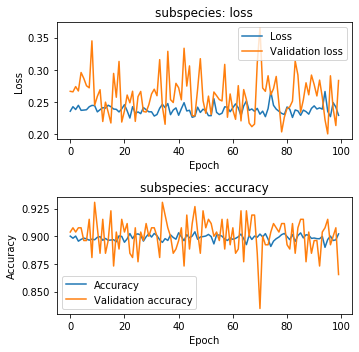

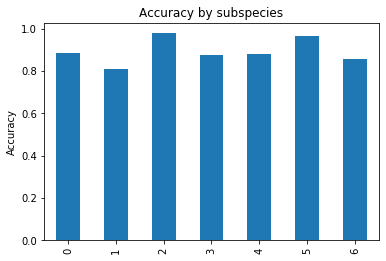

Classification report
                       precision    recall  f1-score   support

                   -1       0.78      0.89      0.83        70
1 Mixed local stock 2       0.58      0.81      0.68        69
  Carniolan honey bee       1.00      0.98      0.99        92
    Italian honey bee       0.95      0.88      0.91       490
    Russian honey bee       0.96      0.89      0.92       110
VSH Italian honey bee       0.65      0.97      0.78        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.89       867
            macro avg       0.85      0.90      0.86       867
         weighted avg       0.91      0.89      0.89       867

Loss function: 0.36229248522139545, accuracy: 0.8881199538638985
StartTime:  2019-11-15 04:44:33.947565  lr: 0.01  batch: 100 epochs:  100  Fin iteracion:  7
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------

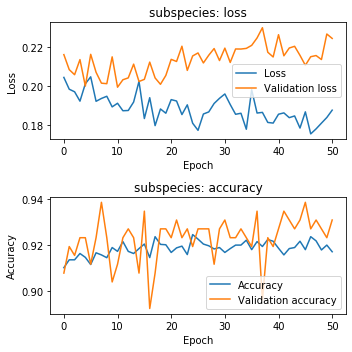

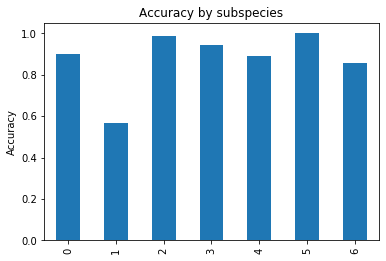

Classification report
                       precision    recall  f1-score   support

                   -1       0.91      0.90      0.91        70
1 Mixed local stock 2       0.63      0.57      0.60        69
  Carniolan honey bee       1.00      0.99      0.99        92
    Italian honey bee       0.92      0.94      0.93       490
    Russian honey bee       0.99      0.91      0.95       110
VSH Italian honey bee       0.83      1.00      0.91        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.90      0.88      0.89       867
         weighted avg       0.91      0.91      0.91       867

Loss function: 0.26044342352878713, accuracy: 0.9111880046136102
StartTime:  2019-11-15 06:34:06.385417  lr: 0.001  batch: 150 epochs:  80  Fin iteracion:  8
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------

45/45 [==============================] - 17s 376ms/step - loss: 0.1871 - acc: 0.9159 - val_loss: 0.2189 - val_acc: 0.9192
Epoch 54/100
45/45 [==============================] - 17s 379ms/step - loss: 0.1763 - acc: 0.9246 - val_loss: 0.2208 - val_acc: 0.9308
Epoch 55/100
45/45 [==============================] - 16s 365ms/step - loss: 0.1798 - acc: 0.9211 - val_loss: 0.2183 - val_acc: 0.9231
Epoch 56/100
45/45 [==============================] - 16s 365ms/step - loss: 0.1861 - acc: 0.9182 - val_loss: 0.2256 - val_acc: 0.9308
Epoch 57/100
45/45 [==============================] - 16s 363ms/step - loss: 0.1872 - acc: 0.9185 - val_loss: 0.2229 - val_acc: 0.9308
Epoch 58/100
45/45 [==============================] - 16s 363ms/step - loss: 0.1850 - acc: 0.9202 - val_loss: 0.2168 - val_acc: 0.9346
Epoch 59/100
45/45 [==============================] - 17s 371ms/step - loss: 0.1713 - acc: 0.9208 - val_loss: 0.2165 - val_acc: 0.9308
Epoch 60/100
45/45 [==============================] - 16s 365ms/step

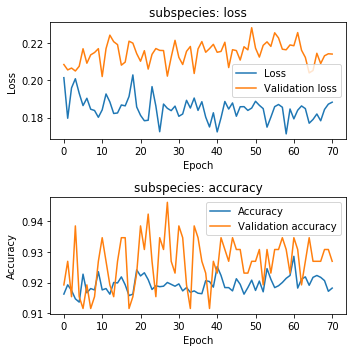

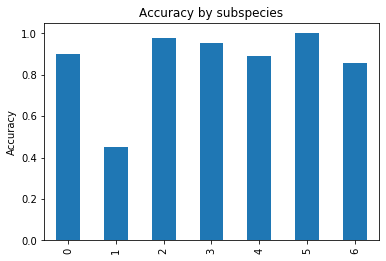

Classification report
                       precision    recall  f1-score   support

                   -1       0.93      0.90      0.91        70
1 Mixed local stock 2       0.65      0.45      0.53        69
  Carniolan honey bee       1.00      0.98      0.99        92
    Italian honey bee       0.90      0.96      0.93       490
    Russian honey bee       0.99      0.90      0.94       110
VSH Italian honey bee       0.83      1.00      0.91        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.90      0.86      0.88       867
         weighted avg       0.90      0.91      0.90       867

Loss function: 0.2549798676106035, accuracy: 0.9077277970011534
StartTime:  2019-11-15 06:48:18.357703  lr: 0.001  batch: 150 epochs:  100  Fin iteracion:  9
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------

Epoch 54/80
68/67 [==============================] - 11s 161ms/step - loss: 0.1913 - acc: 0.9193 - val_loss: 0.2301 - val_acc: 0.9077
Epoch 55/80
68/67 [==============================] - 15s 215ms/step - loss: 0.1960 - acc: 0.9135 - val_loss: 0.2150 - val_acc: 0.9269
Epoch 56/80
68/67 [==============================] - 13s 194ms/step - loss: 0.1893 - acc: 0.9188 - val_loss: 0.2216 - val_acc: 0.9077
Epoch 57/80
68/67 [==============================] - 13s 184ms/step - loss: 0.1837 - acc: 0.9210 - val_loss: 0.2205 - val_acc: 0.9077
Epoch 58/80
68/67 [==============================] - 11s 163ms/step - loss: 0.1837 - acc: 0.9190 - val_loss: 0.2245 - val_acc: 0.9000
Epoch 59/80
68/67 [==============================] - 13s 197ms/step - loss: 0.1886 - acc: 0.9135 - val_loss: 0.2139 - val_acc: 0.9346
Epoch 60/80
68/67 [==============================] - 13s 193ms/step - loss: 0.1863 - acc: 0.9148 - val_loss: 0.2139 - val_acc: 0.9192
Epoch 61/80
68/67 [==============================] - 13s 186ms

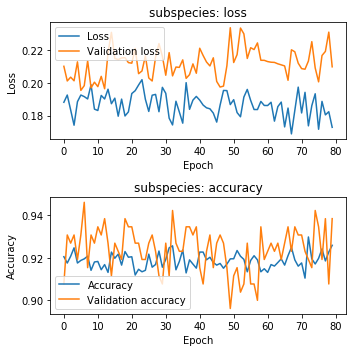

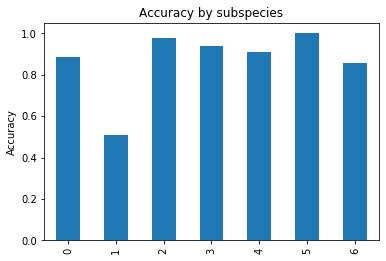

Classification report
                       precision    recall  f1-score   support

                   -1       0.91      0.89      0.90        70
1 Mixed local stock 2       0.60      0.51      0.55        69
  Carniolan honey bee       1.00      0.99      0.99        92
    Italian honey bee       0.91      0.94      0.92       490
    Russian honey bee       0.99      0.92      0.95       110
VSH Italian honey bee       0.83      1.00      0.91        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.89      0.87      0.88       867
         weighted avg       0.90      0.91      0.90       867

Loss function: 0.265410256336988, accuracy: 0.9054209919261822
StartTime:  2019-11-15 07:07:58.497358  lr: 0.001  batch: 60 epochs:  80  Fin iteracion:  10
-------------------------------FIN-----------------------------------------


--------------------------------Inicio----------

68/67 [==============================] - 21s 304ms/step - loss: 0.1883 - acc: 0.9141 - val_loss: 0.2219 - val_acc: 0.9308
Epoch 54/100
68/67 [==============================] - 21s 303ms/step - loss: 0.1924 - acc: 0.9156 - val_loss: 0.2201 - val_acc: 0.9154
Epoch 55/100
68/67 [==============================] - 21s 304ms/step - loss: 0.1788 - acc: 0.9198 - val_loss: 0.2155 - val_acc: 0.9346
Epoch 56/100
68/67 [==============================] - 21s 305ms/step - loss: 0.1932 - acc: 0.9142 - val_loss: 0.2221 - val_acc: 0.9346
Epoch 57/100
68/67 [==============================] - 21s 302ms/step - loss: 0.1936 - acc: 0.9163 - val_loss: 0.2109 - val_acc: 0.9308
Epoch 58/100
68/67 [==============================] - 21s 303ms/step - loss: 0.1763 - acc: 0.9232 - val_loss: 0.2216 - val_acc: 0.9192
Epoch 59/100
68/67 [==============================] - 21s 302ms/step - loss: 0.1824 - acc: 0.9169 - val_loss: 0.2333 - val_acc: 0.9192
Epoch 60/100
68/67 [==============================] - 21s 304ms/step

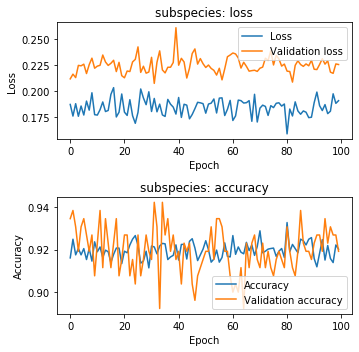

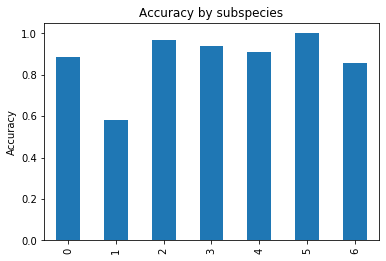

Classification report
                       precision    recall  f1-score   support

                   -1       0.89      0.89      0.89        70
1 Mixed local stock 2       0.63      0.58      0.61        69
  Carniolan honey bee       1.00      0.99      0.99        92
    Italian honey bee       0.92      0.94      0.93       490
    Russian honey bee       1.00      0.91      0.95       110
VSH Italian honey bee       0.78      1.00      0.88        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.89      0.88      0.88       867
         weighted avg       0.91      0.91      0.91       867

Loss function: 0.2879856165749318, accuracy: 0.908881199538639
StartTime:  2019-11-15 07:26:15.932676  lr: 0.001  batch: 60 epochs:  100  Fin iteracion:  11
-------------------------------FIN-----------------------------------------


--------------------------------Inicio---------

102/101 [==============================] - 27s 270ms/step - loss: 0.1838 - acc: 0.9218 - val_loss: 0.2271 - val_acc: 0.9192
Epoch 54/80
102/101 [==============================] - 27s 264ms/step - loss: 0.1843 - acc: 0.9208 - val_loss: 0.2218 - val_acc: 0.9192
Epoch 55/80
102/101 [==============================] - 27s 264ms/step - loss: 0.1847 - acc: 0.9212 - val_loss: 0.2190 - val_acc: 0.9308
Epoch 56/80
102/101 [==============================] - 26s 258ms/step - loss: 0.1836 - acc: 0.9184 - val_loss: 0.2172 - val_acc: 0.9192
Epoch 57/80
102/101 [==============================] - 28s 272ms/step - loss: 0.1792 - acc: 0.9197 - val_loss: 0.2274 - val_acc: 0.9154
Epoch 58/80
102/101 [==============================] - 27s 261ms/step - loss: 0.1728 - acc: 0.9258 - val_loss: 0.2084 - val_acc: 0.9231
Epoch 59/80
102/101 [==============================] - 29s 281ms/step - loss: 0.1782 - acc: 0.9225 - val_loss: 0.2179 - val_acc: 0.9115
Epoch 60/80
102/101 [==============================] - 28s 2

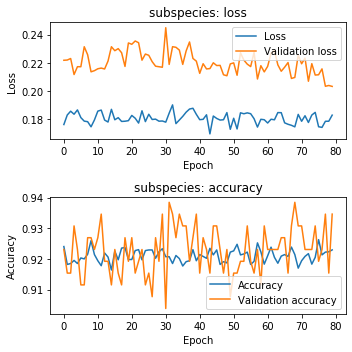

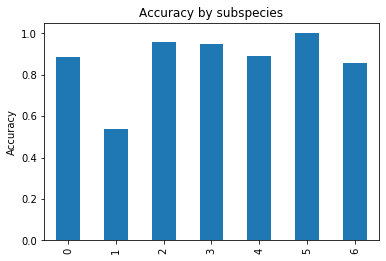

Classification report
                       precision    recall  f1-score   support

                   -1       0.91      0.89      0.90        70
1 Mixed local stock 2       0.64      0.54      0.58        69
  Carniolan honey bee       1.00      0.97      0.98        92
    Italian honey bee       0.91      0.95      0.93       490
    Russian honey bee       0.98      0.89      0.93       110
VSH Italian honey bee       0.76      1.00      0.87        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.89      0.87      0.87       867
         weighted avg       0.90      0.91      0.90       867

Loss function: 0.2819119358256085, accuracy: 0.9054209919261822
StartTime:  2019-11-15 08:21:00.818763  lr: 0.001  batch: 100 epochs:  80  Fin iteracion:  12
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------

102/101 [==============================] - 26s 256ms/step - loss: 0.1763 - acc: 0.9224 - val_loss: 0.2372 - val_acc: 0.9115
Epoch 53/100
102/101 [==============================] - 26s 259ms/step - loss: 0.1800 - acc: 0.9261 - val_loss: 0.2339 - val_acc: 0.9231
Epoch 54/100
102/101 [==============================] - 27s 261ms/step - loss: 0.1772 - acc: 0.9252 - val_loss: 0.2411 - val_acc: 0.9231
Epoch 55/100
102/101 [==============================] - 26s 255ms/step - loss: 0.1875 - acc: 0.9188 - val_loss: 0.2294 - val_acc: 0.9154
Epoch 56/100
102/101 [==============================] - 27s 262ms/step - loss: 0.1773 - acc: 0.9245 - val_loss: 0.2389 - val_acc: 0.9269
Epoch 57/100
102/101 [==============================] - 27s 263ms/step - loss: 0.1761 - acc: 0.9197 - val_loss: 0.2491 - val_acc: 0.9192
Epoch 58/100
102/101 [==============================] - 27s 261ms/step - loss: 0.1893 - acc: 0.9166 - val_loss: 0.2368 - val_acc: 0.9192
Epoch 59/100
102/101 [==============================] 

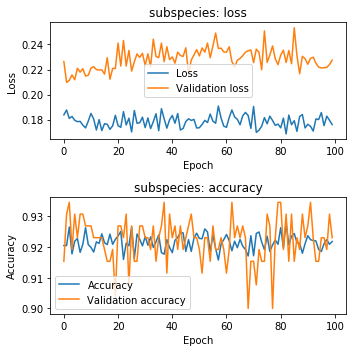

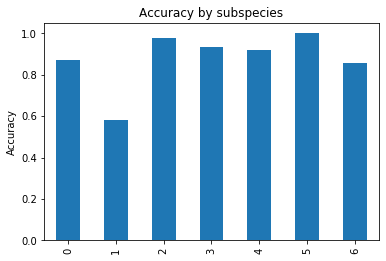

Classification report
                       precision    recall  f1-score   support

                   -1       0.88      0.87      0.88        70
1 Mixed local stock 2       0.62      0.58      0.60        69
  Carniolan honey bee       1.00      0.98      0.99        92
    Italian honey bee       0.91      0.93      0.92       490
    Russian honey bee       1.00      0.92      0.96       110
VSH Italian honey bee       0.83      1.00      0.91        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.89      0.88      0.88       867
         weighted avg       0.91      0.91      0.90       867

Loss function: 0.2855128127342853, accuracy: 0.9054209919261822
StartTime:  2019-11-15 09:09:04.414999  lr: 0.001  batch: 100 epochs:  100  Fin iteracion:  13
-------------------------------FIN-----------------------------------------



In [44]:
Iteration = 1

for lr in [0.01,0.001]:
    for batch_size in [150, 60, 100]:
        steps_per_epoch = steps_per_epoch * 1.5
        for  epochs in [ 80, 100]:
            StartTime = datetime.datetime.now()
            print("")
            print("--------------------------------Inicio----------------------------------------")
            print("StartTime: ", StartTime.strftime("%Y%m%d-%H%M%S") , ' lr:', lr,' batch:', batch_size, "epochs: ", epochs , " inicio iteracion: ", Iteration )
            print("")

            training1, model1 = Utils.train(Num_Architecture,Iteration ,
                                            model1,
                                            train_X,
                                            train_y, 
                                            batch_size = batch_size,
                                            epochs = epochs,
                                            validation_data_X = val_X, 
                                            validation_data_y = val_y,
                                            steps_per_epoch = steps_per_epoch,
                                            rotation_range = rotation_range,
                                            zoom_range = zoom_range, 
                                            width_shift_range = width_shift_range,
                                            height_shift_range = height_shift_range,
                                            horizontal_flip = horizontal_flip,  
                                            vertical_flip = vertical_flip,
                                            patience = patience,
                                            class_weights = class_weights,
                                            learn_rate = lr,
                                            StartTime = StartTime)
            Iteration = Iteration + 1
            print("")
            Utils.eval_model(training1, model1, test_X, test_y, 'subspecies')
            print("StartTime: ", StartTime.strftime("%Y%m%d-%H%M%S") , ' lr:', lr,' batch:', batch_size, "epochs: ", epochs , " Fin iteracion: ", Iteration )
            print("-------------------------------FIN-----------------------------------------")
            print("")
            patience = patience * 1.5
    steps_per_epoch = 40
    patience = 40


## 4.3 Evaluación del modelo

In [ ]:
Utils.eval_model(training1, model1, test_X, test_y, 'subspecies')